In [109]:
import pandas as pd
import matplotlib as plt

## Commuter Trips

Criteria for commuter trips included the following:
1) Between Monday and Friday 
2) Between 7am and 9am or between 4pm and 6pm.
3) Different start and end station


In [150]:
%%bigquery commute_trips

SELECT start_station_name, end_station_name,
COUNT(*) as frequency
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 7 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))
GROUP BY start_station_name, end_station_name 
ORDER BY frequency DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.59rows/s]


In [155]:
commute_trips['trip']=commute_trips['start_station_name']+" to "+commute_trips['end_station_name']
commute_trips

,start_station_name,end_station_name,frequency,trip
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5165,2nd at Townsend to Harry Bridges Plaza (Ferry ...
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5127,Harry Bridges Plaza (Ferry Building) to 2nd at...
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5040,San Francisco Caltrain 2 (330 Townsend) to Tow...
3,Embarcadero at Sansome,Steuart at Market,4904,Embarcadero at Sansome to Steuart at Market
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4756,Embarcadero at Folsom to San Francisco Caltrai...


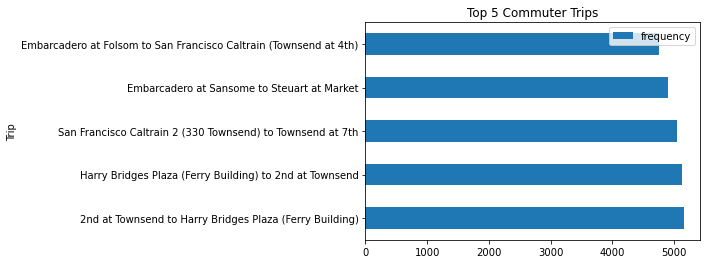

In [158]:
firstgraph=commute_trips.plot.barh(x='trip', y='frequency',title="Top 5 Commuter Trips",xlabel='Trip')

Please note this graph represents Monday-Friday between commute hours of 6am-9am and 4pm-6pm. 

In [36]:
%%bigquery
SELECT count( * ) FROM bigquery-public-data.san_francisco.bikeshare_trips

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.42s/rows]


,f0_
0,983648


In [37]:
%%bigquery
SELECT count(*) FROM bigquery-public-data.san_francisco.bikeshare_trips WHERE subscriber_type='Subscriber'

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.40s/rows]


,f0_
0,846839


In [38]:
%%bigquery
SELECT count(*) FROM bigquery-public-data.san_francisco.bikeshare_trips WHERE subscriber_type='Customer'

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.32s/rows]


,f0_
0,136809


## Recommendations

As it currently stands, a vast majority of Bike Share's business comes from their subscribers. In total, there are 983,648 rides in the dataset. Subscribers accounted for 846,839 riders in the dataset, amounting to 86% of the total rides. Meanwhile, Customers are a smaller faction of the riders, accounting for only 136,809 rides and about 14% of the total rides. 

For recommendations, this leaves one major avenue for expansion. While subscribers are a strong avenue for increasing business, customers represent a major oppurtunity for expansion. Pre coronavirus, in 2019, San Francisco forcasted 26.5 million visitors to the city, generating a total of 10.3 billion dollars of revenue (1). This means that by expanding business amoung non-subscribers, or customers, Lyft can capitalize on a robust tourism market. Below, we will explore how Lyft can go about doing this by taking information from the dataset available to us. 


*Refrences:*
*https://www.sftravel.com/article/san-francisco-travel-reports-record-breaking-tourism-levels-2018-gives-projections-2019#:~:text=For%202019%2C%20San%20Francisco%20Travel,related%20to%20meetings%20and%20conventions.*


**Overall, recommendations will be made on two fronts, the first considering commute patterns, and the second considering customers and tourism.**

## Recommendation 1: Analyzing Most Common Start and End Stations During Commuting Hours

In [97]:
%%bigquery my_pandaframe

SELECT start_station_name,
COUNT(*) as total_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 7 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))
GROUP BY start_station_name
ORDER BY total_rides DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.79rows/s]


In [98]:
%%bigquery my_pandaframe2

SELECT end_station_name,
COUNT(*) as total_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7) and (
(EXTRACT(HOUR FROM start_date) >= 7 and EXTRACT(HOUR FROM start_date) <= 9) 
OR (EXTRACT(HOUR FROM start_date) >= 16 and EXTRACT(HOUR FROM start_date) <= 18))
GROUP BY end_station_name
ORDER BY total_rides DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.13rows/s]


In [99]:
(my_pandaframe)

,start_station_name,total_rides
0,San Francisco Caltrain (Townsend at 4th),52441
1,San Francisco Caltrain 2 (330 Townsend),40264
2,Temporary Transbay Terminal (Howard at Beale),28880
3,Harry Bridges Plaza (Ferry Building),27298
4,Steuart at Market,25313


In [100]:
(my_pandaframe2)

,end_station_name,total_rides
0,San Francisco Caltrain (Townsend at 4th),65411
1,San Francisco Caltrain 2 (330 Townsend),42095
2,Harry Bridges Plaza (Ferry Building),26851
3,2nd at Townsend,26824
4,Steuart at Market,25521


Additionally, here are some visualizations to show these datapoints in more detail. 

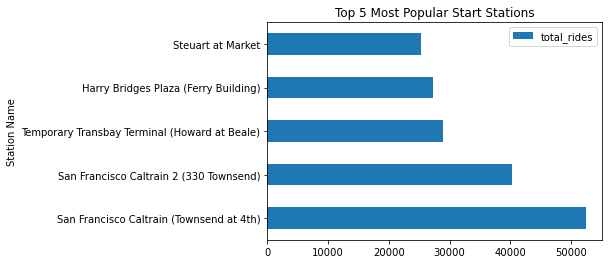

In [112]:
ax = my_pandaframe.plot.barh(x='start_station_name', y='total_rides',title="Top 5 Most Popular Start Stations",xlabel='Station Name')

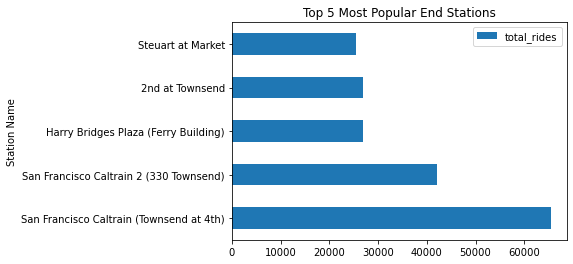

In [108]:
ax2 = my_pandaframe2.plot.barh(x='end_station_name', y='total_rides',title="Top 5 Most Popular End Stations",xlabel='Station Name')

As we can see from the above visualizations, the most popular start and end stations during commute times have a connection to other forms of transportation. Both the most popular start stations and end stations share the following locations:

San Francisco Caltrain (Townsend at 4th), San Francisco Caltrain 2 (330 Townsend), and Harry Bridges Plaza (Ferry Building). 

All three of these have a strong connection to other forms of public transportation. Caltrain is also an important method of transportation for many workers in San Francisco, and The Ferry Building is in very close proximity to the Embarcadero Bart Station, another important form of public transportation for many SF workers. This is inline with data from outside sources, which shows that 247,465 people are inbound commuters to San Francisco (1). Additionally, many commuters who use Caltrain have Caltrain subscriptions, which is a form of ticket for Caltrain (2). 

**Final Recommendation:
Lyft should capitalize on riders who ride Caltrain or Bart in addition to their bikes. As seen from start and end stations, the most popular stations during commute hours Monday through Friday are those in close proximity to Caltrain and Caltrain 2, in addition to the Ferry Building (which is near Embarcadero Bart Station). To capitalize on this potential business, Lyft should consider integrating their riding more closely with Caltrain and Bart riders. This can happen by offering discounts to Caltrain subscribers for a Subscription to bike sharing. Additionally, a one time ticket from Caltrain or Bart from the same day can potentially mean a one time discount to bike sharing customers (who are not subscribers) for the day. There are several promotions/discounts that we can run in relation to Caltrain and Bart riders to find new business among commuters who are not already using bikes.**

*Refrences:*

*(1) https://oewd.org/sf-fast-facts*

*(2) https://www.caltrain.com/Fares/tickettypes.html*

## Recommendation 2: Increasing Ridership Among Customers Outside of Commuting

Outside of just commuting, which is covered in option 1, San Francsico is a popular tourist spot as well, which can present an oppurtunity to boost business. Below we will analyze some data before making a final recommendation. 

In [144]:
%%bigquery my_pandaframe3

SELECT EXTRACT(DAYOFWEEK FROM start_date) as day,
COUNT(*) as total_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY day
ORDER BY day ASC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.63rows/s]


In [146]:
my_pandaframe3['day'] = my_pandaframe3['day'].astype(str)
my_pandaframe3['day'] = my_pandaframe3['day'].replace('7', 'Sat')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('6', 'Fri')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('5', 'Thur')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('4', 'Wed')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('3', 'Tues')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('2', 'Mon')
my_pandaframe3['day'] = my_pandaframe3['day'].replace('1', 'Sun')
df3=my_pandaframe3.reindex([1,2,3,4,5,6,0])
df3


,day,total_rides
1,Mon,169937
2,Tues,184405
3,Wed,180767
4,Thur,176908
5,Fri,159977
6,Sat,60279
0,Sun,51375


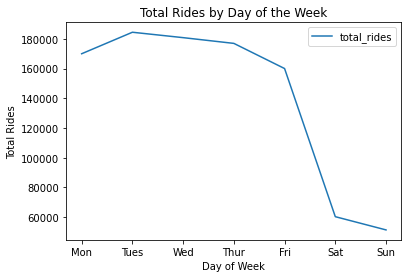

In [147]:
ax3= df3.plot.line(x='day', y='total_rides',title="Total Rides by Day of the Week",xlabel='Day of Week',ylabel='Total Rides')

to understand this graph, please understand the following:
Day of the Week:
1=Sunday
2=Monday
3=Tueday
4=Wednesday
5=Thursday
6=Friday
7=Saturday

As we can see from the graph above, there is a sharp increase in ridership during the workweek, (Monday through Friday) and the weekend lags behind in total rides on Saturday and Sunday. In order to maximize business, there is a need to maximize the business on weekends. Despite the robust tourism, this graph seems to show that the weekends are not a major source of revenue. 

In [160]:
%%bigquery my_pandaframe4

SELECT EXTRACT(HOUR FROM start_date) as hours,
COUNT(*) as total_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) NOT IN (1, 7)
GROUP BY hours
ORDER BY hours ASC

Downloading: 100%|██████████| 24/24 [00:01<00:00, 21.73rows/s]


In [161]:
my_pandaframe4

,hours,total_rides
0,0,1696
1,1,797
2,2,420
3,3,427
4,4,1273
5,5,4799
6,6,19830
7,7,65900
8,8,128999
9,9,90264


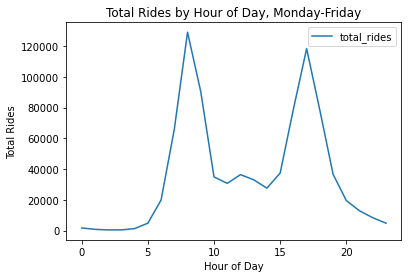

In [162]:
ax = my_pandaframe4.plot.line(x='hours', y='total_rides',title="Total Rides by Hour of Day, Monday-Friday",xlabel='Hour of Day',ylabel='Total Rides')

Above we can see a graph of between Monday and Friday, which shows total of rides by hour of the day,(0-24 hours). We can see a sharp increase in ridership during traditional commuter hours, both in the morning and afternoon. However, outside of that ridership is lower during non-commute hours Monday-Friday. This is also something we can address to maximize business. 

**FINAL RECOMMENDATIONS:**

**As seen in Graph 1, there is a sharp decline in ridership on the weekends. In order to address this, we can integrate our rides more with the tourism and sightseeing on the city. Integrating the bike rentals with popular sights by offering discount can sway visitors to chose bikes as their transporation.**

**Additionally, as seen by Graph 2, between Monday and Friday there is a sharp increase in ridership during commuting hours. However in between, and before and after commute hours, there is a sharp decline in ridership. To address this, we can offer a substantial discount to riders who are customers and not subscribers (only during non-commuter hours) in order to boost ridership during off hours.**